## **Summary**

Now-a-days every person is conscious about their fitness and do many exercises to maintain their fitness. One of them is running on treadmill. This dataset contains customer treadmill purchase information. The data is about which treadmill is most used. Which age of customers are using which treadmill? Which treadmill is mostly used?

## **Data Fields**



*   Product - the model no. of the treadmill
*   Age - in no of years, of the customer
*   Gender - of the customer
*   Education - in no. of years, of the customer
*   Marital Status - of the customer
*   Usage - Average times the customer wants to use the treadmill every week
*   Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
*   Income - of the customer
*   Miles- expected to run



### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes = True)   
sns.set_palette(palette = 'viridis', n_colors = 8)

### **Importing Data**

In [2]:
data = pd.read_csv('./CardioGoodFitness.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### **Checking the Dataset**

In [3]:
data.shape

(180, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object



*   Dataset has 9 columns among them **Product**, **Gender** and Marital Status are **Object** type.
*   Other than above mentioned columns are **Numeric** type.



In [6]:
# Converting Object data type in Category

data['Product'] = data.Product.astype('category')
data['Gender'] = data.Gender.astype('category')
data['MaritalStatus'] = data.MaritalStatus.astype('category')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


*   The range of customers are from 18 to 50.
*   The average education of the customer is 15.6.
*   Max use of treadmill is of 7 days a week whereas minimum use is of 2 days a week.
*   The 1st, 2nd, and 3rd quartile of Usage and Fitness is same.
*   The 3rd quartile and max of Miles has a big difference. This shows it has outliers.



In [8]:
data.describe(exclude='number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107




*   Among the treadmills **TM195** is the top product with the frequency of **80**.
*   The number of males is quite high which shows that males are using treadmill more thean females.
*   Couples are more conscious about their health and using treadmill more than Singles.





### **Checking Missing Values**

In [9]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


*   Data has no missing values.



### **Finding Unique Values**

In [10]:
def unique(item):
  print('Column name: ', item)
  print('Unique Values: ', data[item].unique())
  print('Number of Unique Value: ', data[item].nunique())
  print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
  print('\n')

In [11]:
for i in data.columns:
  unique(i)

Column name:  Product
Unique Values:  ['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']
Number of Unique Value:  3
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Column name:  Age
Unique Values:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Number of Unique Value:  32
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Column name:  Gender
Unique Values:  ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Number of Unique Value:  2
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Column name:  Education
Unique Values:  [14 15 12 13 16 18 20 21]
Number of Unique Value:  8
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Column name:  MaritalStatus
Unique Values:  ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
Number of Unique Value:  2
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Column name:  Usage
Unique Values:  [3 2 4 5 6 7]
Number of Unique Value

### **Data Processing**

In [12]:
product_grp = data.groupby([data.Product])

In [13]:
product_grp.size()

Product
TM195    80
TM498    60
TM798    40
dtype: int64

This shows the frequency of different products.


*   TM195 model is highest purchased treadmill by 80 customers.
*   TM498 model is second highest purchased treadmill by 60 customers.
*   TM798 model purchase is half in front of model TM195 by only 40 customers.





In [14]:
product_grp.min()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,18,12,2,1,29562,38
TM498,19,12,2,1,31836,21
TM798,22,14,3,3,48556,80


In [15]:
product_grp.max()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,50,18,5,5,68220,188
TM498,48,18,5,4,67083,212
TM798,48,21,7,5,104581,360



*   Maximum customer of TM195 model are of age 50, which indicates it is quite famous between this age of customers.
*   TM798 model has highest values in Education and Income. It has best usage of 7 days a week with 360 miles run.




In [16]:
product_grp.mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


In [17]:
product_grp.std()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,7.221452,1.216383,0.782624,0.664540,9075.783190,28.874102
TM498,6.645248,1.222552,0.799717,0.629770,8653.989388,33.263135
TM798,6.971738,1.639066,0.946993,0.667467,18505.836720,60.066544


## **Correlation between numerical columns**

In [18]:
corr_data = data.corr()
corr_data

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


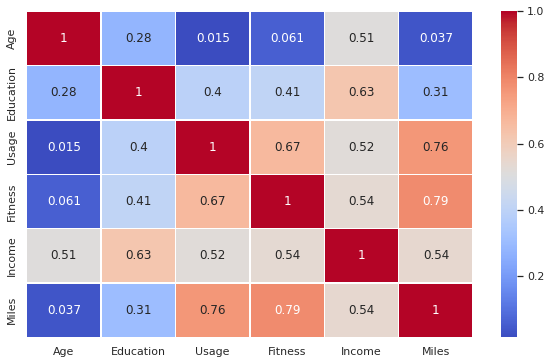

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_data, cmap='coolwarm', annot=True, linewidth=0.4, linecolor='white')

### **Data Visualization**

**Product**

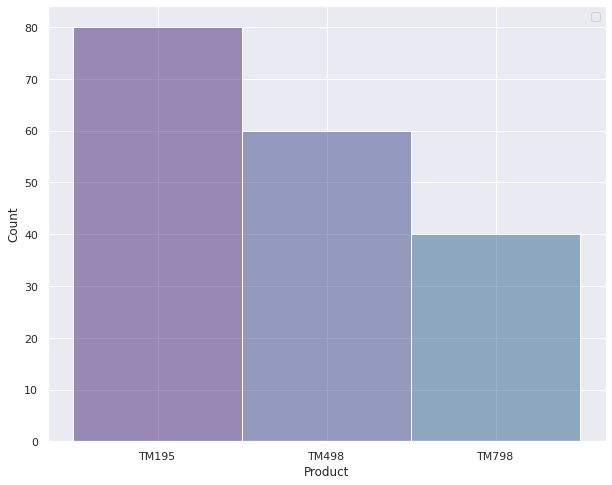

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(x=data['Product'], hue=data['Product'])
plt.legend('')

The product TM195 has most number of customers which is 44.4%.

The product TM498 has second most number of customers which is 33.3%.

The product TM498 has least number of customers which is 22.2%.

**Gender**

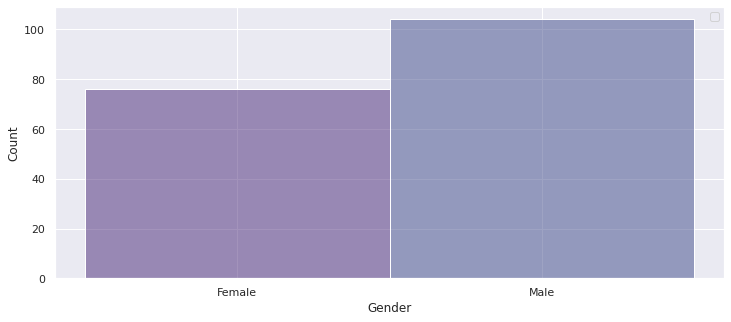

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(x=data['Gender'], hue=data['Gender'])
plt.legend('')

There are 76 females using treadmill which is around 42% of total customers.

The number of males using treadmill is 104 which is 58% of total customers.

**Marital Status**

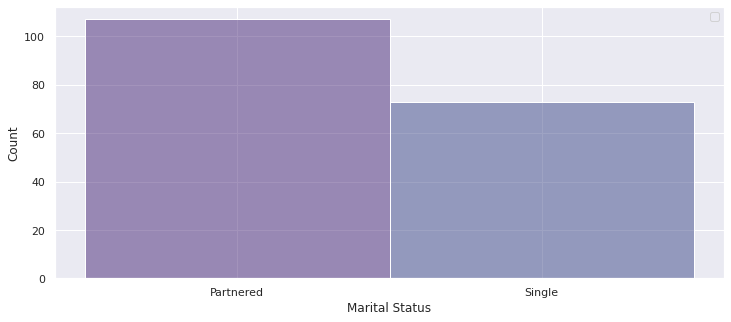

In [22]:
plt.figure(figsize=(12,5))
sns.histplot(x=data['MaritalStatus'], hue=data['MaritalStatus'])
plt.xlabel('Marital Status')
plt.legend('')

There are 74 Singles using treadmill which is around 41% of total customers.

The number of Couples using treadmill is 106 which is 59% of total customers.

**Age**



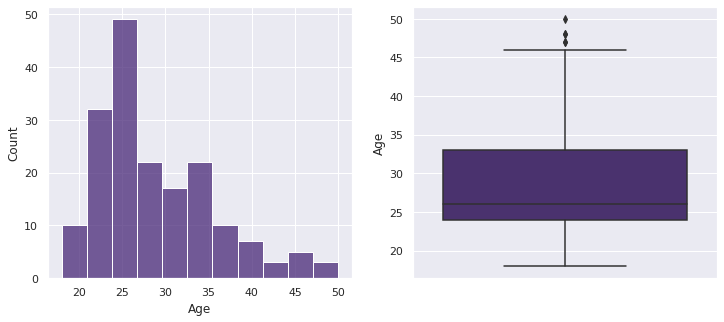

In [23]:
plt.figure(figsize = (12,5))    
plt.subplot(1,2,1)           
sns.histplot(data.Age)          
plt.subplot(1,2,2)              
sns.boxplot(y = data.Age)    
plt.show()   

The minimum age of customer is 18 whereas maximum age of customer is 46 and 50 being an outlier.

The average age of customers is between 24 to 33.

**Education**

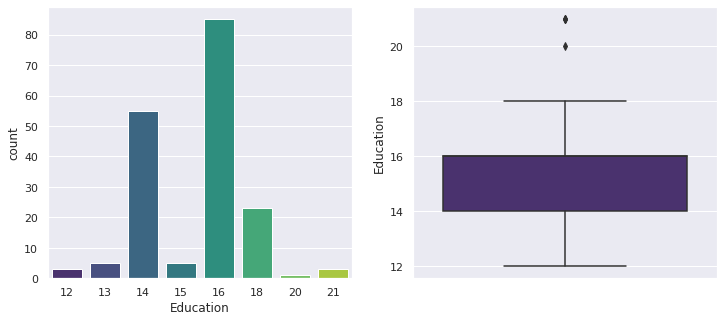

In [24]:
plt.figure(figsize = (12,5))    
plt.subplot(1,2,1)           
sns.countplot(data.Education)          
plt.subplot(1,2,2)              
sns.boxplot(y = data.Education)    
plt.show()   

The customers have minimum of 12 years  and maximum 18 years of education where 21 is as outlier.

Most customers have 16 years of education.

There are no customers of 17 and 19 years of education.

**Fitness**

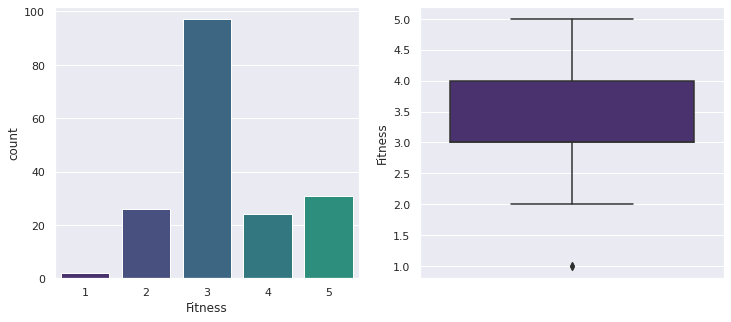

In [25]:
plt.figure(figsize = (12,5))    
plt.subplot(1,2,1)           
sns.countplot(data.Fitness)          
plt.subplot(1,2,2)              
sns.boxplot(y = data.Fitness)    
plt.show()   

The range of fitness is from 'unfit' (rating 2) to 'very fit' (rating 5).

There is an outlier of 'very unfit' (rating 1).

Rating 3 ia the mostly used rating for their fitness.

There are some customers who have rated their fitness 'very fit' (rating 5).

**Usage**

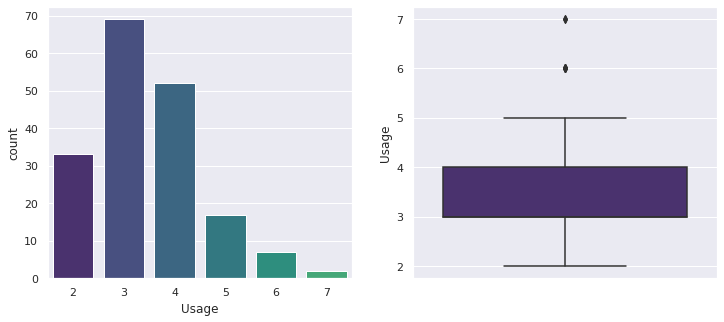

In [26]:
plt.figure(figsize = (12,5))    
plt.subplot(1,2,1)           
sns.countplot(data.Usage)          
plt.subplot(1,2,2)              
sns.boxplot(y = data.Usage)    
plt.show()   

The minimum usage of treadmill if averagly 2 days a week.

The most number of usage by the customers is for 3 days a week.

Customers using treadmill for 4 days a week are very significant.

The outlier indicates that customers using treadmill more than 6 days is very low.

**Miles**

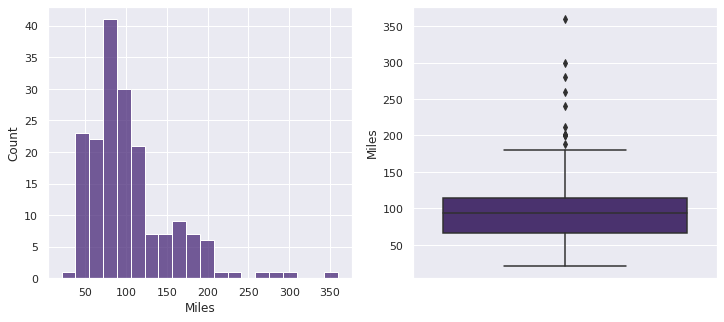

In [27]:
plt.figure(figsize = (12,5))    
plt.subplot(1,2,1)           
sns.histplot(data.Miles)          
plt.subplot(1,2,2)              
sns.boxplot(y = data.Miles)    
plt.show()   

The minimum number of miles expected to run is from 21 miles a week and maximum is 180 mile a week.

**Income**

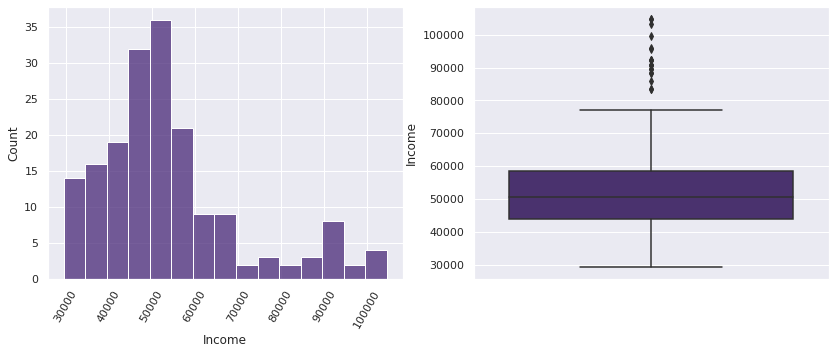

In [28]:
plt.figure(figsize = (14,5))    
plt.subplot(1,2,1)           
sns.histplot(data.Income)   
plt.xticks(rotation = 60)    
plt.subplot(1,2,2)              
sns.boxplot(y = data.Income)    
plt.show()   

The minimum value of the average annual income of the customer is about 30k whereas the maximum is around 77k with outliers ranging more than 104k.


The IQR ranges between 43k to 58k.

**Age vs Income**

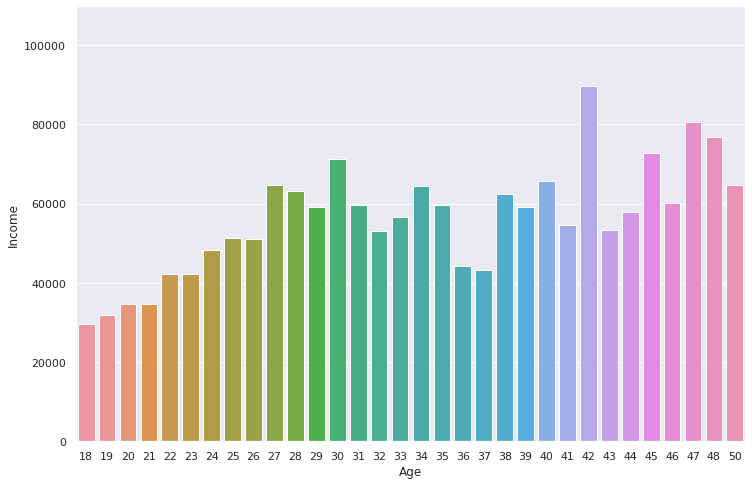

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['Age'], y=data['Income'], errwidth=0)

**Age vs Usage**

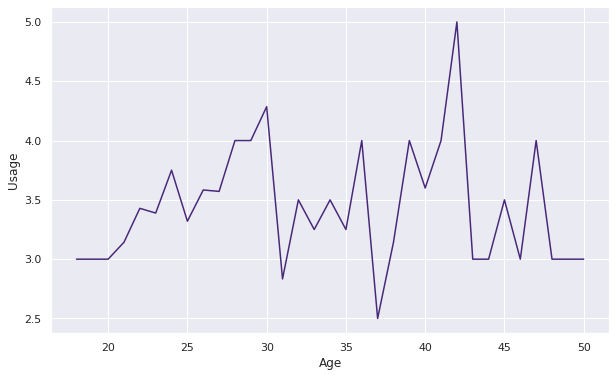

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Age'], y=data['Usage'], ci=None)

**Age vs Fitness**

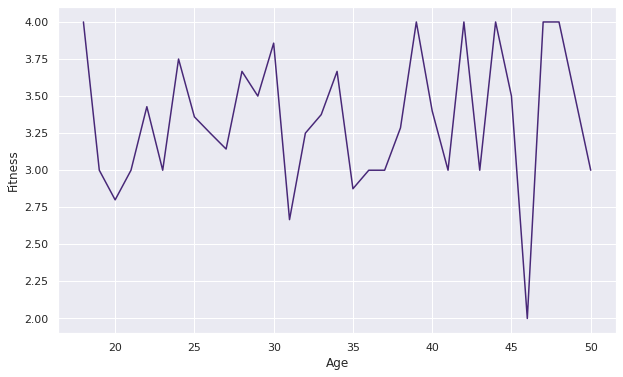

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Age'], y=data['Fitness'], ci=None)

**Age vs Miles**

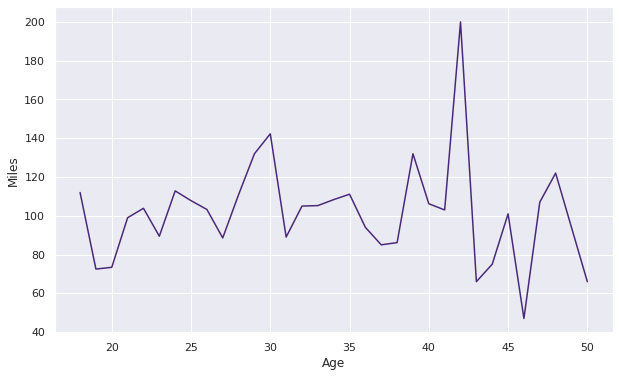

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Age'], y=data['Miles'], ci=None)

**Usage vs Fitness**

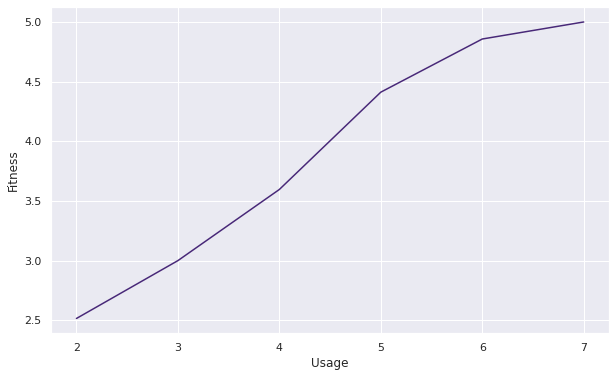

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Usage'], y=data['Fitness'], ci=None)

**Usage vs Miles**

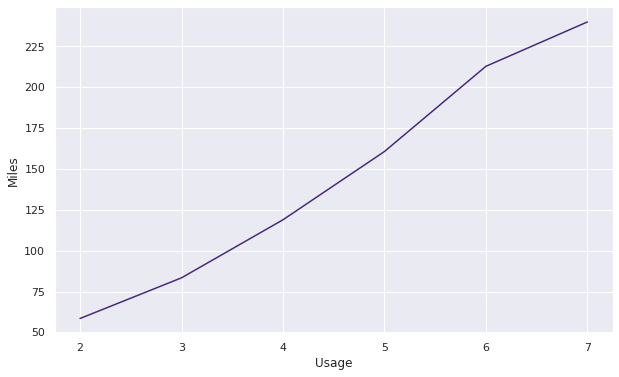

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Usage'], y=data['Miles'], ci=None)

**Fitness vs Miles**

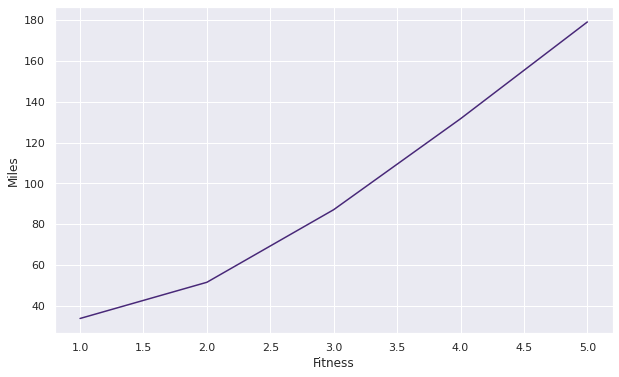

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Fitness'], y=data['Miles'], ci=None)

**Income vs Miles**

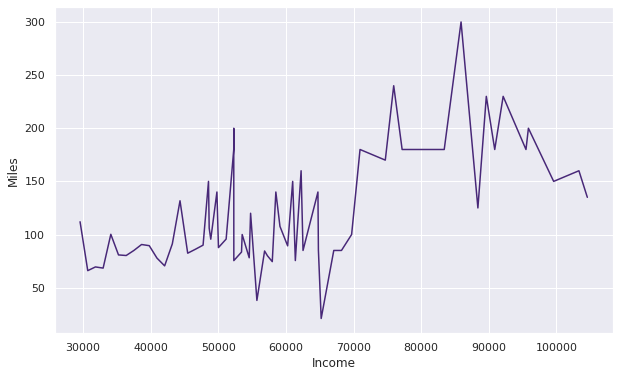

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Income'], y=data['Miles'], ci=None)

**Product vs Gender**

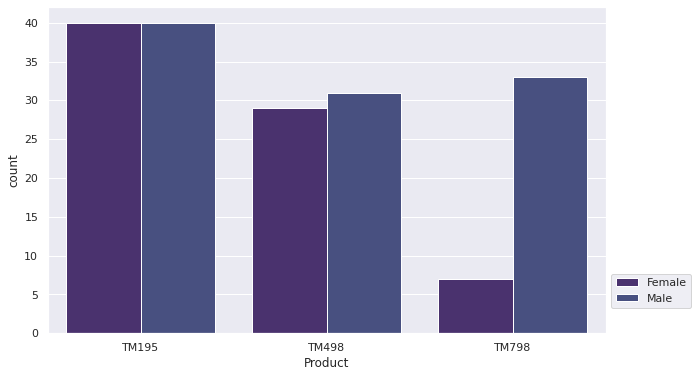

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Product'], hue=data['Gender'])
plt.legend(bbox_to_anchor = (1,0.2)) 

**Product vs Marital Status**

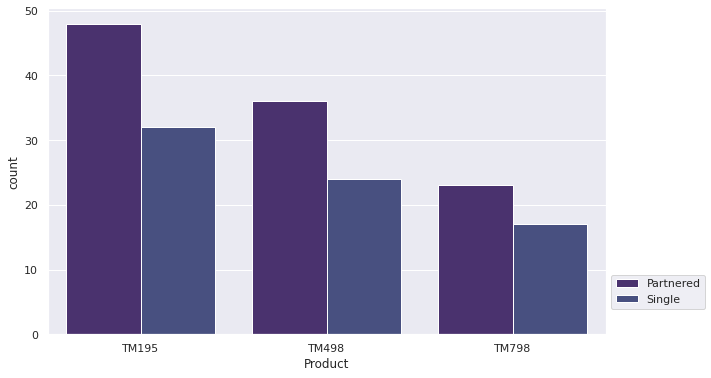

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Product'], hue=data['MaritalStatus'])
plt.legend(bbox_to_anchor = (1,0.2)) 

**Marital Status vs Gender**

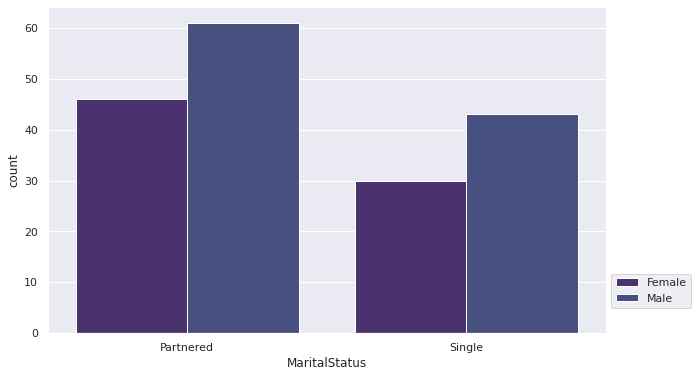

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['MaritalStatus'], hue=data['Gender'])
plt.legend(bbox_to_anchor = (1,0.2)) 

**Product vs Age**

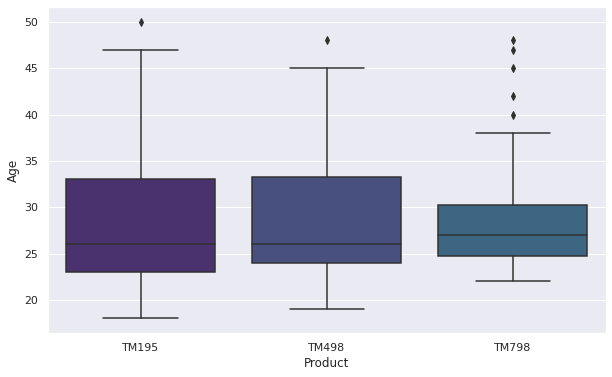

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Product'], y=data['Age'])

**Product vs Usage**

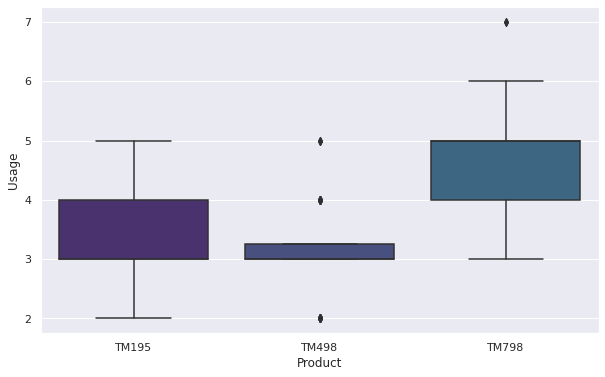

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Product'], y=data['Usage'])

**Product vs Fitness**

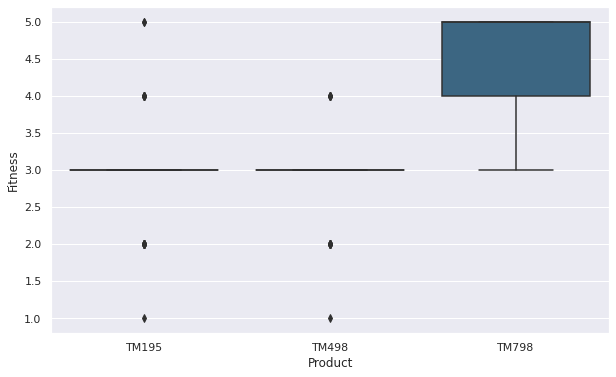

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Product'], y=data['Fitness'])

**Product vs Miles**

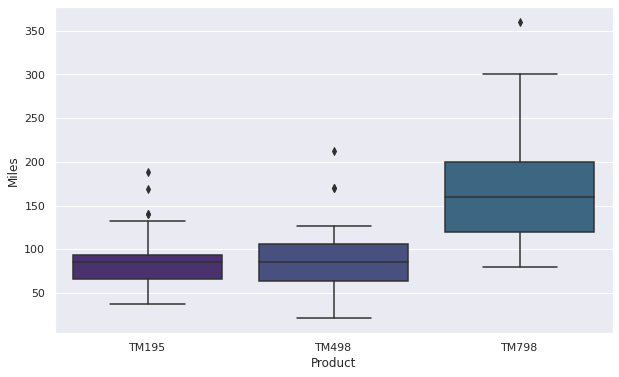

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Product'], y=data['Miles'])

**Product vs Income**

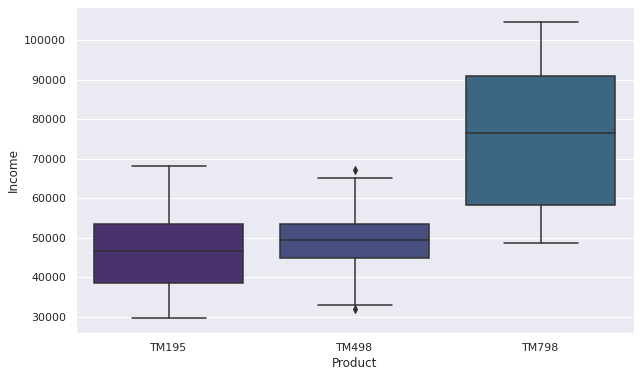

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Product'], y=data['Income'])

**Product vs Education**

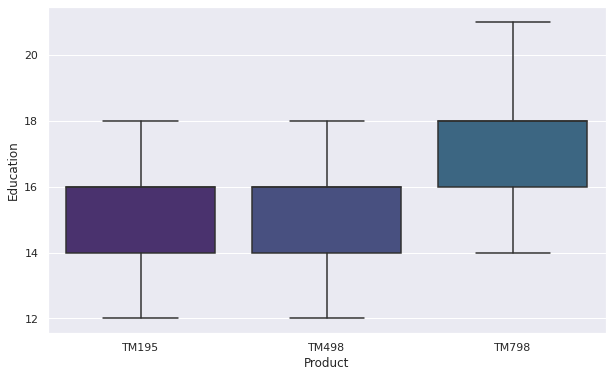

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Product'], y=data['Education'])

**Marital Status vs Usage**

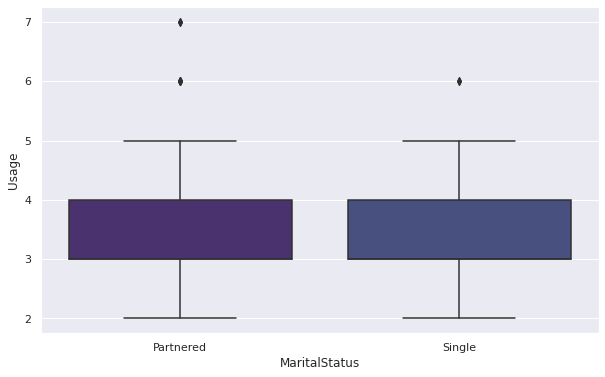

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['MaritalStatus'], y=data['Usage'])

**Product vs Education vs Usage vs Gender**

<Figure size 720x432 with 0 Axes>

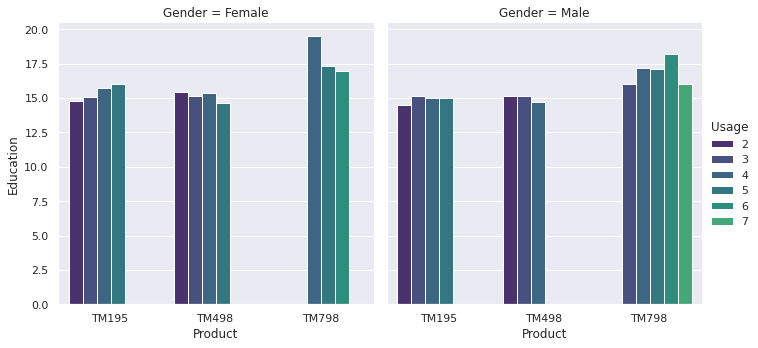

In [47]:
plt.figure(figsize=(10,6))
sns.catplot(data = data, x = 'Product', y = 'Education', hue = 'Usage', ci = None, col = 'Gender', kind = 'bar')



1.   **TM195**
*   This model used by females having 14 - 16 years of education using 2-5 days a week and 5 days usage is high frequency.
*   This model iused by males having 13 - 15 years of education using 2-5 days a week and 3 days usage is high frequency.


2.   **TM498**
*   This model used by females having 13 - 16 years of education using 2-5 days a week and 2 and 4 days usage have high frequency.
*   This model used by males having 14 - 15 years of education using 2-4 days a week and 2 and 3 days usage is high frequency.


3.   **TM798**

*   This model used by females having 17 - 19 years of education using 4-6 days a week and 4 days usage have high frequency.
*   This model used by males having 16 - 18 years of education using 3-7 days a week and 6 days usage is high frequency.


**Product vs Income vs Usage vs Gender**

<Figure size 720x432 with 0 Axes>

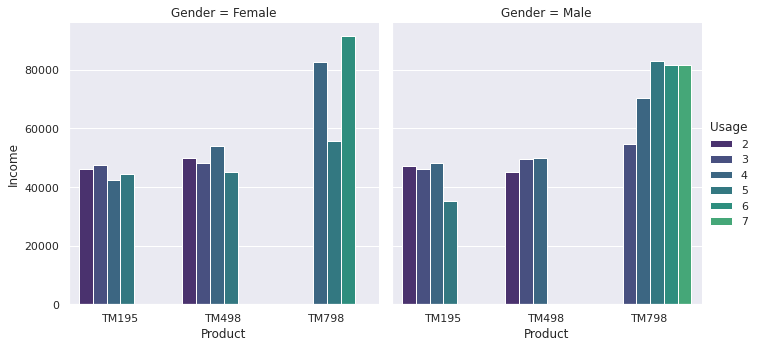

In [48]:
plt.figure(figsize=(10,6))
sns.catplot(data = data, x = 'Product', y = 'Income', hue = 'Usage', ci = None, col = 'Gender', kind = 'bar')



1.   **TM195**
*   Females using this model have income from 42k - 44k with 2-5 days usage.
*   Males using this model have income from 36k - 44k with 2-5 days usage.


2.   **TM498**
*   Females using this model have income from 44k - 54k with 2-5 days usage.
*   Males using this model have income from 43k - 48k with 2-4 days usage.


3.   **TM798**

*   Females using this model have income from 58k - 95k+ with 4-6 days usage.
*   Males using this model have income from 57k - 82k with 3-7 days usage.


**Product vs Age vs Usage vs Gender**

<Figure size 720x432 with 0 Axes>

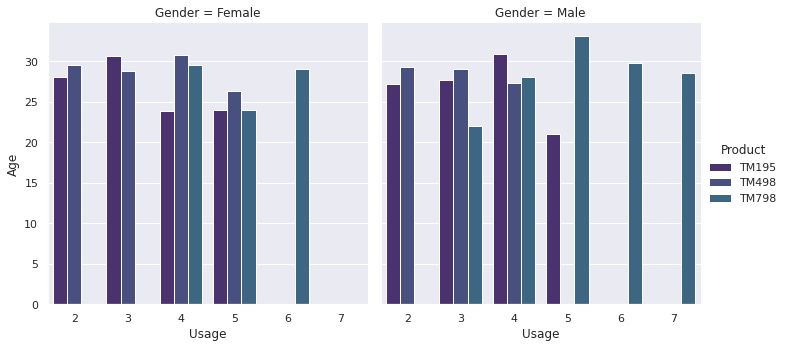

In [49]:
plt.figure(figsize=(10,6))
sns.catplot(data = data, x = 'Usage', y = 'Age', hue = 'Product', ci = None, col = 'Gender', kind = 'bar')



1.   **TM195**
*   Females using this model are of 23 - 32 years age with 2-5 days usage.
*   Males using this model have income from 22 - 34 with 2-5 days usage.


2.   **TM498**
*   Females using this model are of 27 - 32 years age with 2-5 days usage.
*   Males using this model have income from 27 - 29 with 2-4 days usage.


3.   **TM798**

*   Females using this model are of 24 - 29 years age with 4-6 days usage.
*   Males using this model have income from 22 - 33 with 3-7 days usage.


**Fitness vs Usage vs Product**

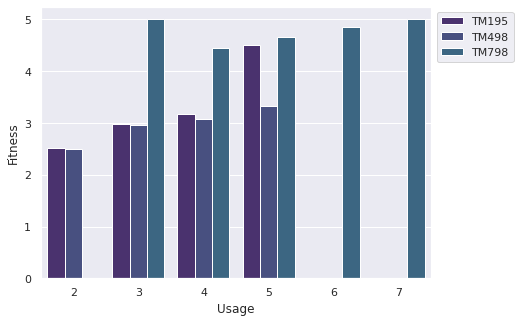

In [50]:
plt.figure(figsize = (7,5))
sns.barplot(x = 'Usage', y = 'Fitness', data = data, hue = 'Product', errwidth=0)
plt.legend(bbox_to_anchor=(1, 1))



1.   **TM195**
*   Usage of the model is 2-5 and personal fitness score is also 2-5.


2.   **TM498**
*   Usage of the model is 2-5 and personal fitness score is also 2-4.


3.   **TM798**

*   Usage of the model is 3-7 and personal fitness score is also 3-7.


**Miles vs Income vs Usage**

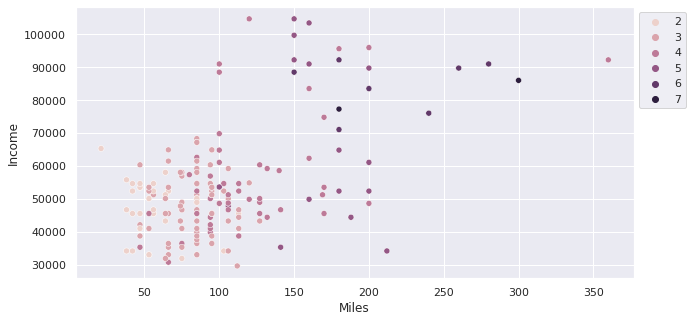

In [51]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Miles', y = 'Income', hue = 'Usage', data = data)
plt.legend(bbox_to_anchor=(1,1))

Customers having income under 70k ran around 220 miles with usage of 2-4 days a week.

Customers having income over 70k ran around 120-300 miles with usage of 3-7 days a week.

**Usage vs Miles vs Fitness vs Product**

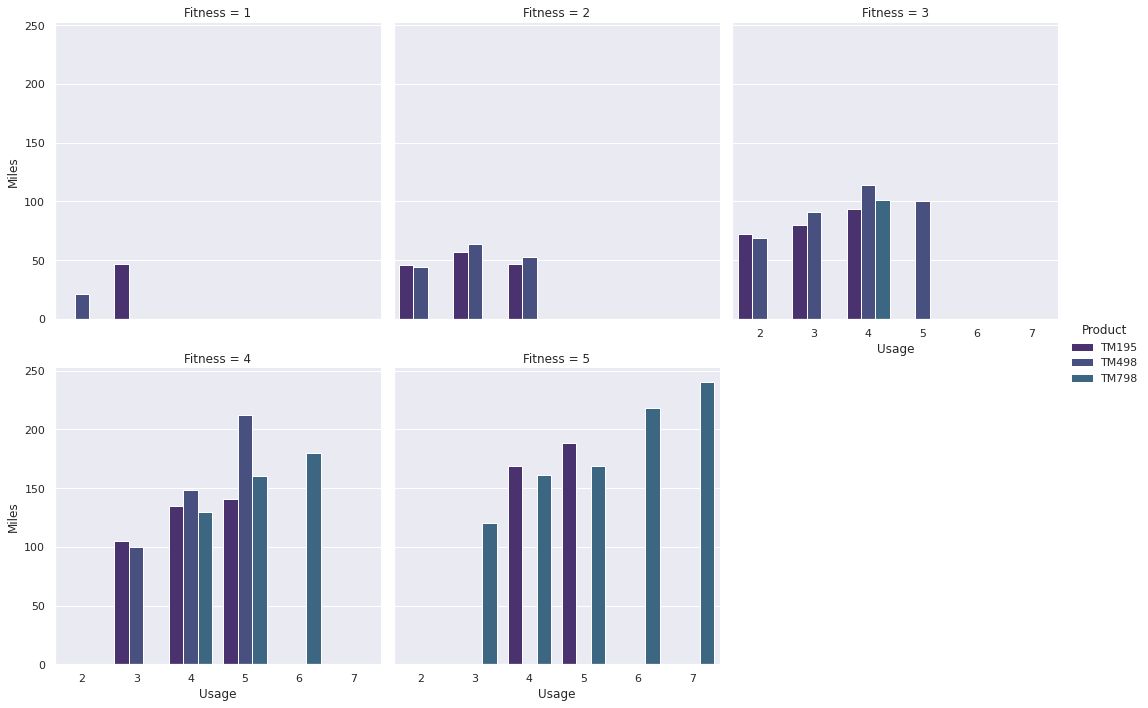

In [52]:
sns.catplot(x = 'Usage',  y = 'Miles', col = 'Fitness', data = data, hue = 'Product', kind = 'bar', ci = None, col_wrap = 3)



1.   **TM195**
*   Used anywhere between 2-5 days/week. Miles run is 40-180 miles/week. Fitness rating is 1 to 5.


2.   **TM498**
*   Used anywhere between 2-5 days/week. Miles run is 20-220 miles/week. Fitness rating is 1 to 5.


3.   **TM798**

*   Used anywhere between 3-7 days/week. Miles run is 80-230 miles/week. Fitness rating is 3 to 5.


## **Conclusion**

### **'TM195'**

Minimum age of the customers is 18 and the maximum is 50 years.

Equally preferred by both male and female customers.

Education is 12-18 years.

Minimum average annual income is 29.5k.

Frequent usage of the produt is 3-4 days/week.

Self fitness rating ranges from 1 to 5

### **'TM498'**

Minimum age of the customers is 19 and the maximum is 48 years.

Number of male customers is slightly above the female customers.

Education is 12-18 years.

Minimum average annual income is 31.8k.

Frequent usage of the product is 3 days/week.

Self fitness rating ranges from 1 to 4.

### **'TM798'**

Minimum age of the customers is 22 and the maximum is 48 years.

Highly preferred by male customers.

Education is 14-21 years.

Minimum average annual income is 48.5k.

Frequent usage of the product is 3 days/week.

Self fitness rating ranges from 4 to 5.

# **Insights**

The overall percentage of male customers is greater than female customers.

Model 'TM798' is preferred by customers with an annual income >48k which indicates that this model is highly priced and is not affordable by others.

Higher percentage of the customers are married.

Marital status does not influence the average usage/week.

Usage and miles run per week have a strong correlation.

Customers with an average annual income >70k seem to run the most 
anywhere between 120 and 300 miles.

Higher usage = Higher personal fitness rating